In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [153]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [154]:
df =  pd.read_csv('C:\\Users\\varad\\Desktop\\cricket_hackathon\\ipl_csv2\\all_matches.csv')
df.loc[df['batting_team'] == 'Rising Pune Supergiant', 'batting_team'] = 'Rising Pune Supergiants'
df.loc[df['bowling_team'] == 'Rising Pune Supergiant', 'bowling_team'] = 'Rising Pune Supergiants'

C:\Users\varad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [155]:
#819 matches data present
df['match_id'].nunique()

819

In [156]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194349,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194350,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194351,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.4,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194352,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df['total_runs'] = df.runs_off_bat + df.extras

In [158]:
df.iloc[1].values


array([335982, '2007/08', '2008-04-18', 'M Chinnaswamy Stadium', 1, 0.2,
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'BB McCullum', 'SC Ganguly', 'P Kumar', 0, 0, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 0], dtype=object)

In [159]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'total_runs'],
      dtype='object')

In [160]:
df.striker.unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'AC Gilchrist',
       'Y Venugopal Rao', 'VVS Laxman', 'A Symonds', 'RG Sharma',
       'SB Styris', 'AS Yadav', 'SB Bangar', 'WPUJC Vaas', 'RP Singh',
       'WP Saha', 'LR Shukla', 'L Ronchi', 'ST Jayasuriya', 'DJ Thornely',
       'RV Uthappa', 'PR Shah', 'AM Nayar', 'SM Pollock',
       'Harbhajan Singh', 'S Chanderpaul', 'LRPL Taylor',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [161]:
# df[df.match_id == 335982][df.innings == 2][df.ball <=6.0]

In [179]:
copy = df.copy()

copy = copy[copy.ball<6.0]
copy = copy[copy.innings <=2]
copy = copy.groupby(['match_id','innings'])
copy.striker.unique()


match_id  innings
335982    1                      [SC Ganguly, BB McCullum, RT Ponting]
          2          [R Dravid, W Jaffer, V Kohli, JH Kallis, CL Wh...
335983    1                          [PA Patel, ML Hayden, MEK Hussey]
          2                                         [K Goel, JR Hopes]
335984    1                    [T Kohli, YK Pathan, SR Watson, M Kaif]
                                           ...                        
1254058   2          [Washington Sundar, V Kohli, RM Patidar, GJ Ma...
1254059   1               [RD Gaikwad, F du Plessis, MM Ali, SK Raina]
          2                                        [PP Shaw, S Dhawan]
1254060   1                                     [N Rana, Shubman Gill]
          2               [WP Saha, DA Warner, MK Pandey, JM Bairstow]
Name: striker, Length: 1636, dtype: object

In [163]:
stats_batsman = {}
# strike_rate = {}
tot_batsmen = df.striker.unique()

# player = {'Dhoni' : {'avg':150, 'sr':150}, 'Kohli': {'avg':200, 'sr':200}}
# player['Dhoni']['avg']


for i,batsman in enumerate(tot_batsmen):
    avg = df[df.striker == batsman]['runs_off_bat'].sum()/len(df[df.striker == batsman]['match_id'].unique())
    sr = 100*df[df.striker == batsman]['runs_off_bat'].sum()/len(df[df.striker == batsman])
    print(i)
#     career_avg[batsman] = avg
#     strike_rate[batsman] = sr

    stats_batsman[batsman] = {'avg':avg, 'sr':sr}
    
stats_batsman['V Kohli']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

{'avg': 32.005405405405405, 'sr': 127.55277897457992}

In [164]:
df[df.striker == 'V Kohli']['runs_off_bat'].sum()

5921

In [165]:
stats_bowler = {}
# strike_rate = {}
tot_bowler = df.bowler.unique()

# player = {'Dhoni' : {'avg':150, 'sr':150}, 'Kohli': {'avg':200, 'sr':200}}
# player['Dhoni']['avg']


for i,bowler in enumerate(tot_bowler):
    eco = df[df.bowler == bowler]['total_runs'].sum()/len(df[df.bowler == bowler]['match_id'].unique())
    avg_wkts = df[df.bowler == bowler][df.wicket_type != np.nan].sum()/len(df[df.bowler == bowler]['match_id'].unique())
    print(i)
#     career_avg[batsman] = avg
#     strike_rate[batsman] = sr


# check for runout do not give to bowler


    stats_bowler[bowler] = {'eco':eco, 'avg_wkts':avg_wkts}
    
# stats_batsman['V Kohli']
stats_bowler['P Kumar']

C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [166]:
print(career_avg['V Kohli'], strike_rate['V Kohli'])

32.005405405405405 127.55277897457992


In [167]:
ipl_data = df[['match_id','venue','innings','ball','batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras']]

ipl_data = ipl_data[ipl_data['ball']<6.0]
ipl_data = ipl_data[ipl_data['innings'] == 1]
ipl_data['total_runs'] = ipl_data['runs_off_bat'] + ipl_data['extras'] 
ipl_data = ipl_data.drop(['runs_off_bat','extras'], axis=1)

ipl_data = ipl_data.groupby(['match_id','venue','innings', 'batting_team', 'bowling_team']).total_runs.sum()
# ipl_data['batsmen'] = ipl_data.groupby(['match_id','venue','innings']).striker.unique()

ipl_data = ipl_data.reset_index()
ipl_data = ipl_data.drop('match_id', axis=1)
ipl_data

,venue,innings,batting_team,bowling_team,total_runs
0,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,61
1,"Punjab Cricket Association Stadium, Mohali",1,Chennai Super Kings,Kings XI Punjab,53
2,Feroz Shah Kotla,1,Rajasthan Royals,Delhi Daredevils,40
3,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,47
4,Eden Gardens,1,Deccan Chargers,Kolkata Knight Riders,39
...,...,...,...,...,...
814,Sheikh Zayed Stadium,1,Delhi Capitals,Sunrisers Hyderabad,65
815,Dubai International Cricket Stadium,1,Delhi Capitals,Mumbai Indians,41
816,"MA Chidambaram Stadium, Chepauk, Chennai",1,Mumbai Indians,Royal Challengers Bangalore,41
817,"Wankhede Stadium, Mumbai",1,Chennai Super Kings,Delhi Capitals,33


In [168]:
venue_encoder = LabelEncoder()
team_encoder = LabelEncoder()

ipl_data['venue'] = venue_encoder.fit_transform(ipl_data['venue'])
ipl_data['batting_team'] = team_encoder.fit_transform(ipl_data['batting_team'])
ipl_data['bowling_team'] = team_encoder.fit_transform(ipl_data['bowling_team'])

ipl_data.drop(columns = ['innings'], inplace = True)

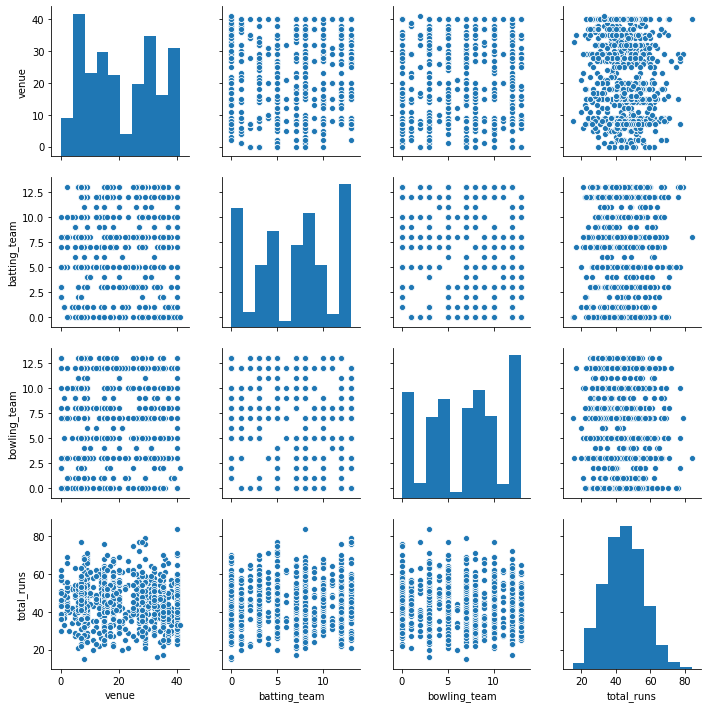

In [169]:
sns.pairplot(ipl_data)

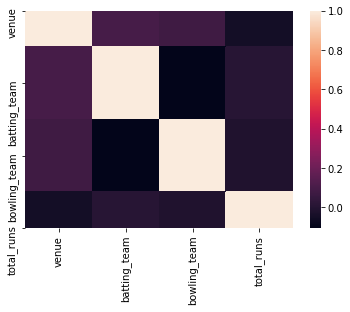

In [170]:
c = ipl_data.corr()
sns.heatmap(c)

In [171]:
anArray = ipl_data.to_numpy()
X, y = anArray[:,:3], anArray[:,3]
# X = np.concatenate((np.eye(42)[anArray[:,0]],
#                     np.eye(2)[anArray[:,1] - 1],
#                     np.eye(15)[anArray[:,2]],
#                     np.eye(15)[anArray[:,3]],), axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train[:5]

array([[ 8,  7,  8],
       [30,  0, 10],
       [ 2,  8,  1],
       [ 9,  3, 12],
       [15, 12,  5]], dtype=int64)

In [172]:
# np.eye(42)[anArray[:,0]]

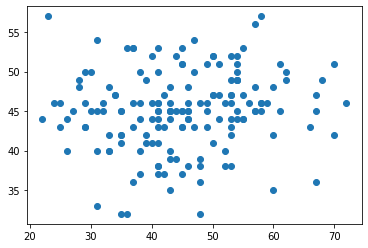

In [173]:
# model = RandomForestRegressor()
# model = LinearRegression()
model = KNeighborsRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test).astype(np.int)
# y_pred
plt.scatter(y_test, y_pred)
# y_test
# base = y_test.mean()*np.ones_like(y_test)
# y_pred

In [180]:
from sklearn.metrics import mean_squared_error

In [182]:
print(r2_score(y_test,y_pred))

-0.10484950349279565


In [184]:
mean_squared_error(y_test,y_pred)

127.67682926829268

In [183]:
print(cross_val_score(model, X, y, cv = 3, scoring = 'r2'))

[-0.14240849 -0.24369499 -0.19520183]
